In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal
from sklearn.impute import SimpleImputer
from google.colab import files

In [2]:
uploaded = files.upload()

Saving dataset_PD.csv to dataset_PD.csv
Saving dataset_validation.csv to dataset_validation.csv


In [315]:
train_df = pd.read_csv("dataset_PD.csv")
test_df = pd.read_csv("dataset_validation.csv")

In [316]:
train_df.head()

,loan_id,Age,Education,MaritalStatus,HasDependents,EmploymentType,MonthsEmployed,Income,CreditScore,NumCreditLines,HasMortgage,DTIRatio,LoanPurpose,LoanAmount,LoanTerm,InterestRate,HasCoSigner,Default
0,0,25,PhD,Married,Yes,Self-employed,84,119007,790,3,No,0.73,Business,93703,60,12.48,No,0
1,1,40,Master's,Divorced,Yes,Self-employed,50,63276,420,1,Yes,0.14,Auto,240094,24,4.54,Yes,0
2,2,38,PhD,Single,Yes,Self-employed,45,45264,563,4,Yes,0.54,Education,179845,36,22.49,Yes,0
3,3,51,PhD,Divorced,Yes,Unemployed,60,88939,617,4,Yes,0.51,Auto,212685,24,11.82,Yes,0
4,4,47,PhD,Single,No,Self-employed,50,120066,401,3,Yes,0.34,Education,24352,60,10.16,No,0


In [317]:
print(train_df.shape)
print(test_df.shape)

(200000, 18)
(50000, 17)


In [318]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_id         200000 non-null  int64  
 1   Age             200000 non-null  int64  
 2   Education       200000 non-null  object 
 3   MaritalStatus   200000 non-null  object 
 4   HasDependents   200000 non-null  object 
 5   EmploymentType  200000 non-null  object 
 6   MonthsEmployed  200000 non-null  int64  
 7   Income          200000 non-null  int64  
 8   CreditScore     200000 non-null  int64  
 9   NumCreditLines  200000 non-null  int64  
 10  HasMortgage     200000 non-null  object 
 11  DTIRatio        200000 non-null  float64
 12  LoanPurpose     200000 non-null  object 
 13  LoanAmount      200000 non-null  int64  
 14  LoanTerm        200000 non-null  int64  
 15  InterestRate    200000 non-null  float64
 16  HasCoSigner     200000 non-null  object 
 17  Default   



# Exploratory Data Analysis #


In [319]:
sns.set_theme(style="whitegrid", context="talk")

df = train_df.copy()

In [320]:
df.drop(columns='loan_id',inplace=True)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             200000 non-null  int64  
 1   Education       200000 non-null  object 
 2   MaritalStatus   200000 non-null  object 
 3   HasDependents   200000 non-null  object 
 4   EmploymentType  200000 non-null  object 
 5   MonthsEmployed  200000 non-null  int64  
 6   Income          200000 non-null  int64  
 7   CreditScore     200000 non-null  int64  
 8   NumCreditLines  200000 non-null  int64  
 9   HasMortgage     200000 non-null  object 
 10  DTIRatio        200000 non-null  float64
 11  LoanPurpose     200000 non-null  object 
 12  LoanAmount      200000 non-null  int64  
 13  LoanTerm        200000 non-null  int64  
 14  InterestRate    200000 non-null  float64
 15  HasCoSigner     200000 non-null  object 
 16  Default         200000 non-null  int64  
dtypes: float64

In [322]:
df.head()

,Age,Education,MaritalStatus,HasDependents,EmploymentType,MonthsEmployed,Income,CreditScore,NumCreditLines,HasMortgage,DTIRatio,LoanPurpose,LoanAmount,LoanTerm,InterestRate,HasCoSigner,Default
0,25,PhD,Married,Yes,Self-employed,84,119007,790,3,No,0.73,Business,93703,60,12.48,No,0
1,40,Master's,Divorced,Yes,Self-employed,50,63276,420,1,Yes,0.14,Auto,240094,24,4.54,Yes,0
2,38,PhD,Single,Yes,Self-employed,45,45264,563,4,Yes,0.54,Education,179845,36,22.49,Yes,0
3,51,PhD,Divorced,Yes,Unemployed,60,88939,617,4,Yes,0.51,Auto,212685,24,11.82,Yes,0
4,47,PhD,Single,No,Self-employed,50,120066,401,3,Yes,0.34,Education,24352,60,10.16,No,0


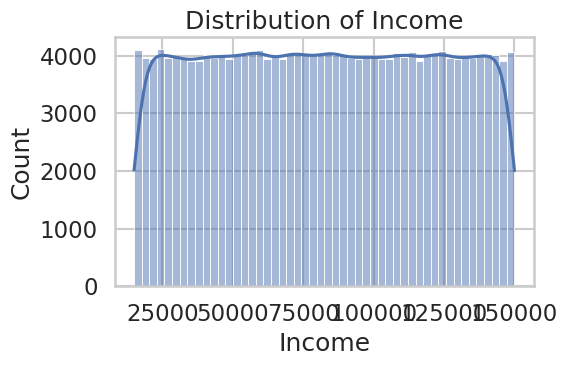

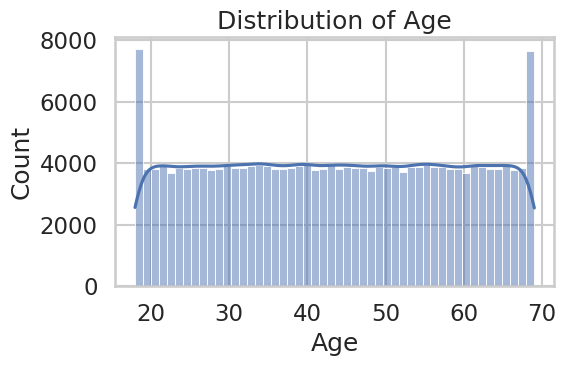

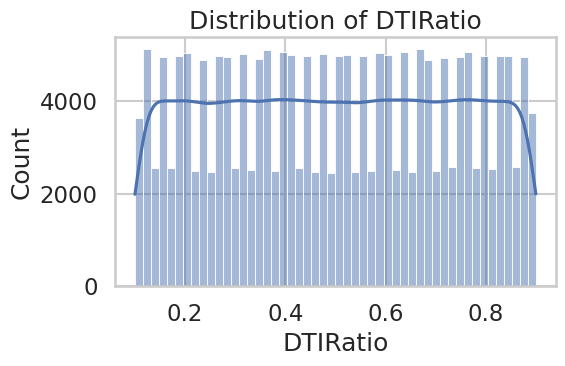

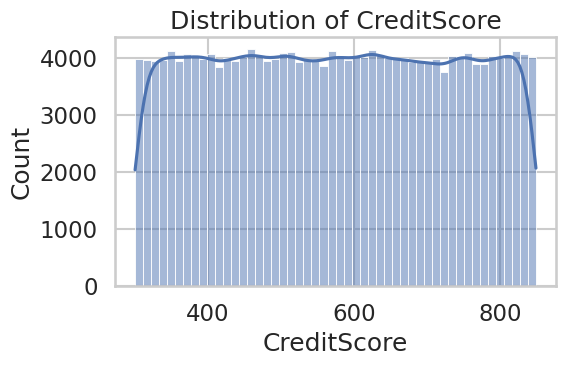

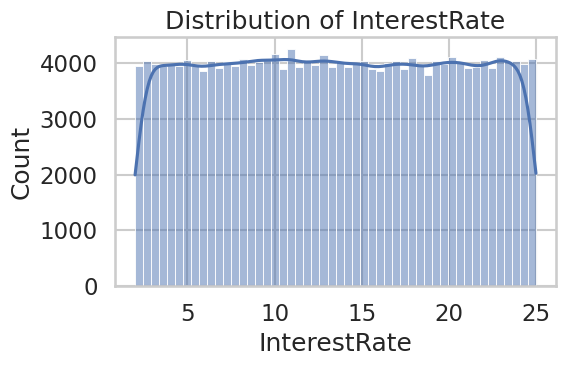

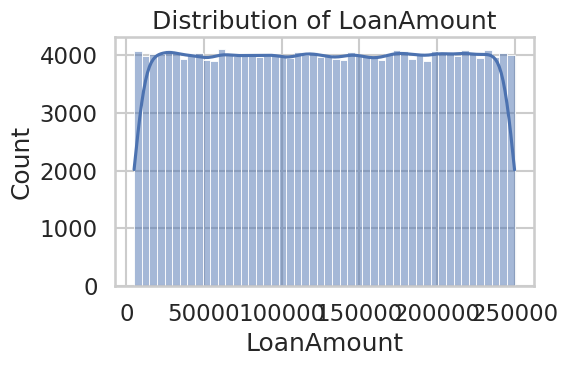

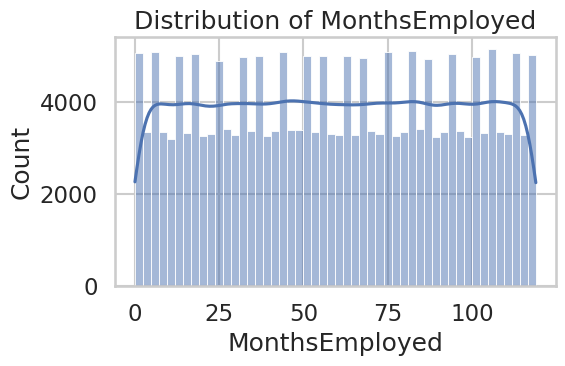

In [327]:
num_features = [
    "Income",
    "Age",
    "DTIRatio",
    "CreditScore",
    "InterestRate",
    "LoanAmount",
    "MonthsEmployed"
]

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

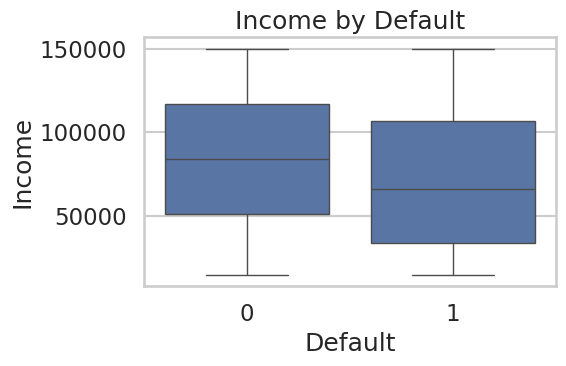

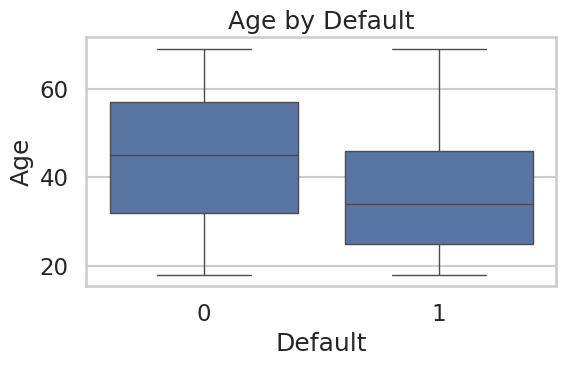

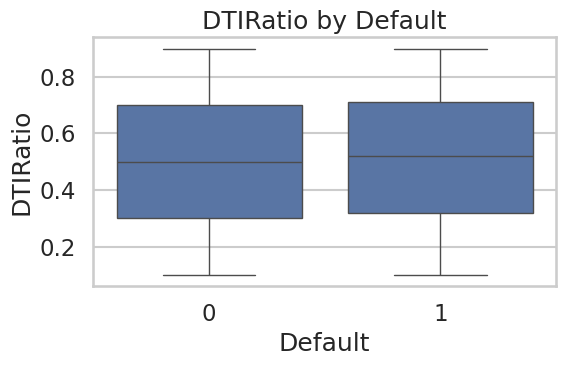

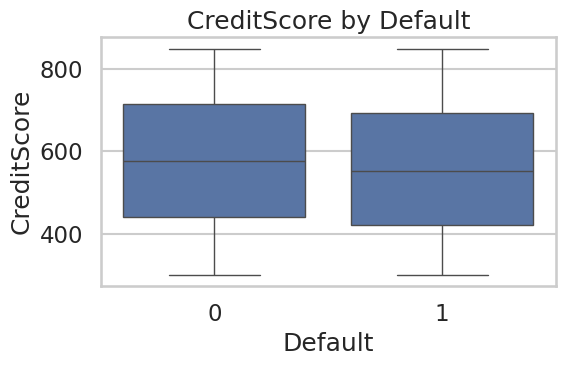

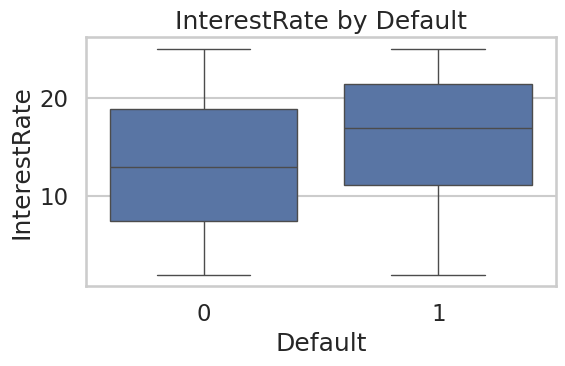

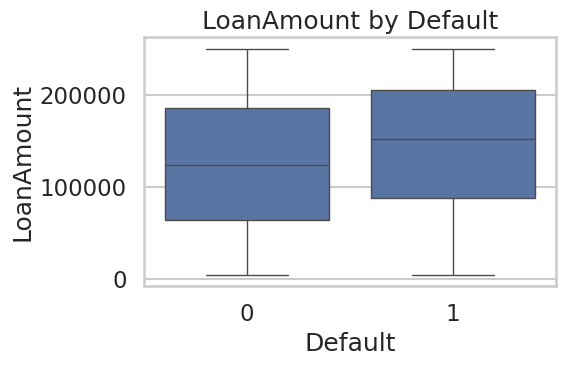

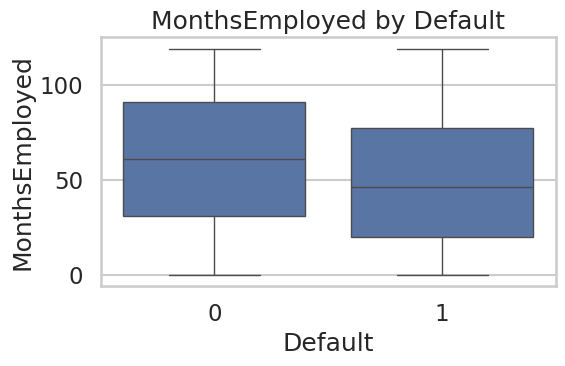

In [328]:
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Default", y=col, data=df)
    plt.title(f"{col} by Default")
    plt.tight_layout()
    plt.show()

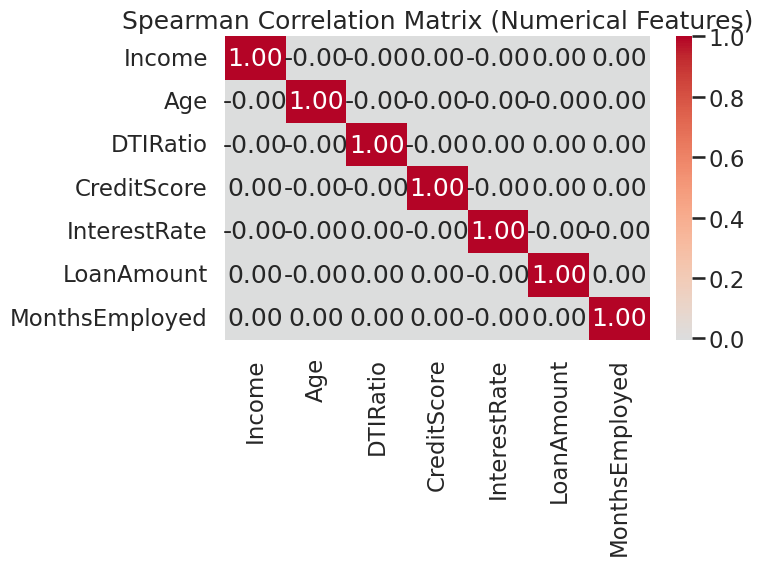

In [329]:
num_df = df[num_features]

corr_spearman = num_df.corr(method="spearman")

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_spearman,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Spearman Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()

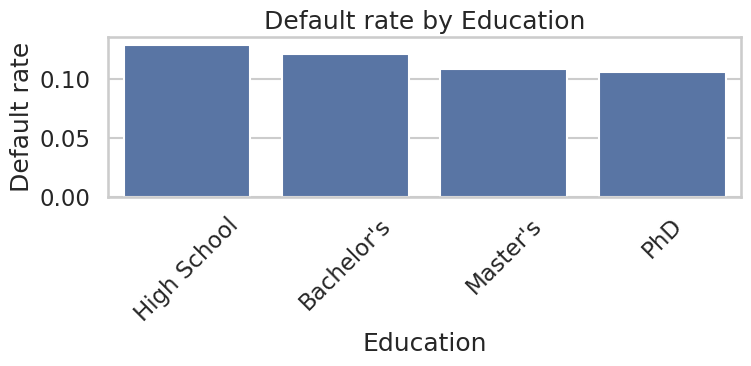

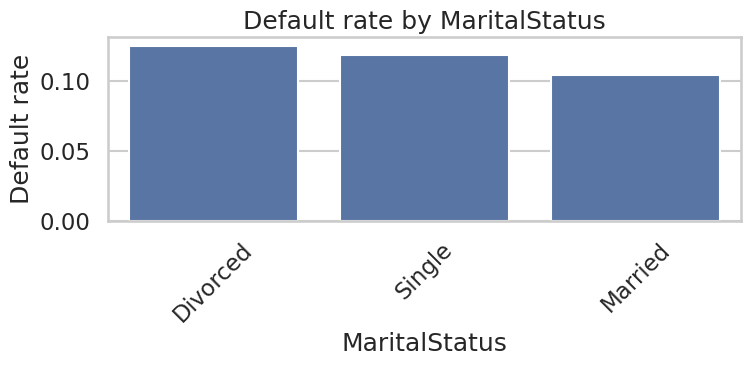

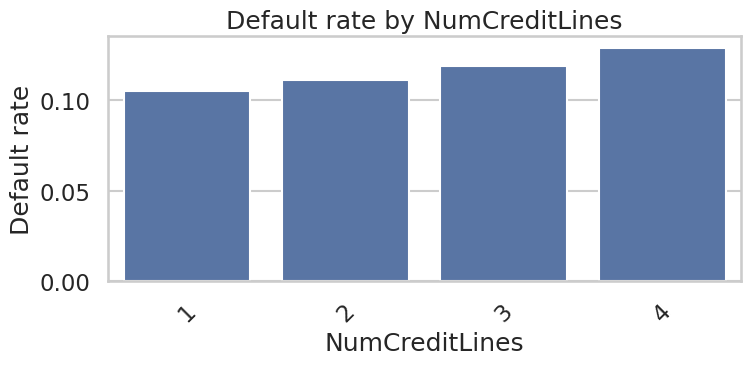

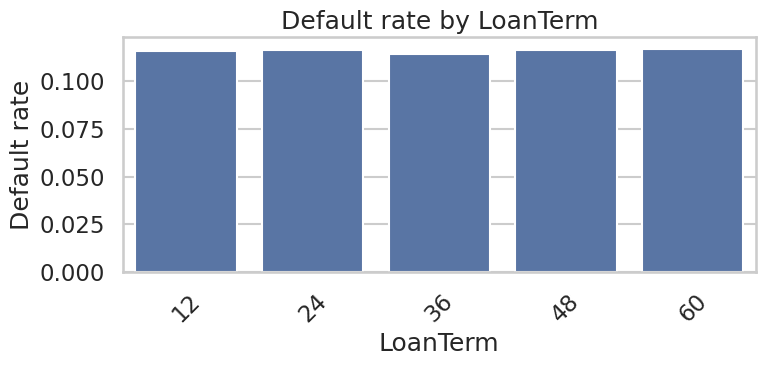

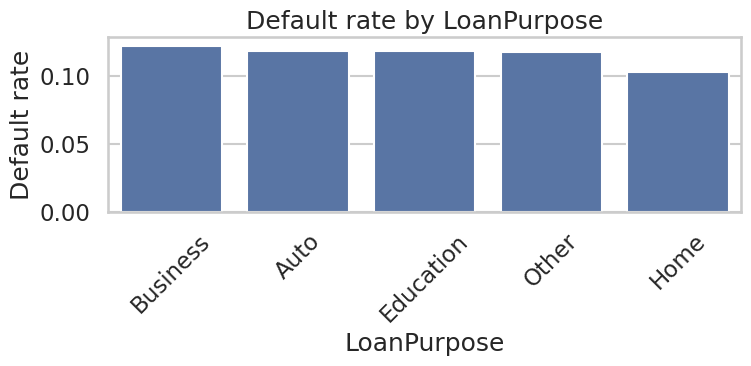

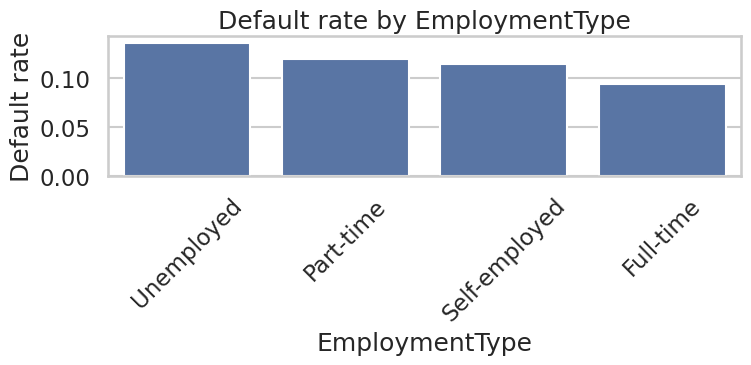

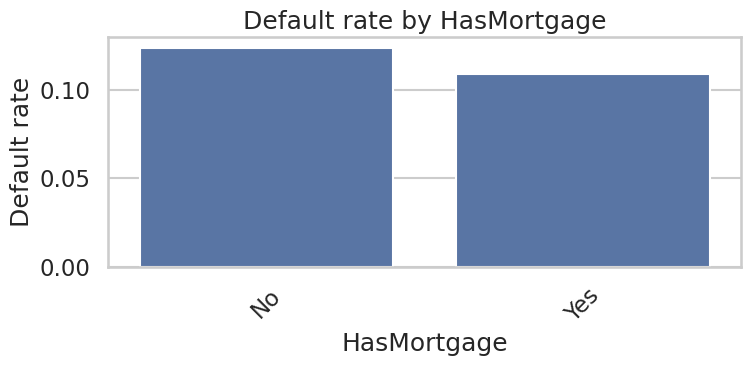

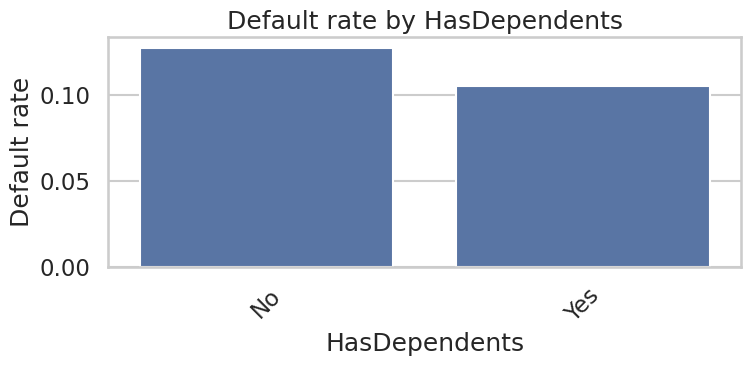

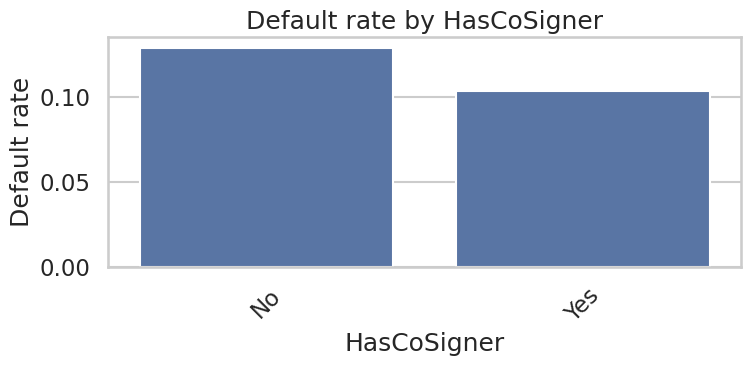

In [330]:
cat_features = [
    'Education',
    "MaritalStatus",
    "NumCreditLines",
    "LoanTerm",
    "LoanPurpose",
    "EmploymentType",
    "HasMortgage",
    "HasDependents",
    "HasCoSigner"
]

for col in cat_features:
    plt.figure(figsize=(8,4))
    default_rate_by_cat = (
        df.groupby(col)["Default"]
        .mean()
        .sort_values(ascending=False)
    )
    sns.barplot(
        x=default_rate_by_cat.index,
        y=default_rate_by_cat.values
    )
    plt.title(f"Default rate by {col}")
    plt.ylabel("Default rate")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [331]:
from scipy.stats import ks_2samp

ks_results = []

for col in num_features:
    ks_stat, p_value = ks_2samp(
        df[df["Default"] == 0][col],
        df[df["Default"] == 1][col]
    )
    ks_results.append({
        "feature": col,
        "ks_stat": ks_stat,
        "p_value": p_value
    })

ks_df = pd.DataFrame(ks_results).sort_values("ks_stat", ascending=False)

### f-regression ###

In [332]:
cols_to_binary = ['HasDependents', 'HasMortgage', 'HasCoSigner']

binary_map = {
    "Yes": 1,
    "No": 0
}

df[cols_to_binary] = df[cols_to_binary].replace(binary_map).astype(int)

/tmp/ipython-input-1917542942.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_to_binary] = df[cols_to_binary].replace(binary_map).astype(int)


In [383]:
test_df[cols_to_binary] = test_df[cols_to_binary].replace(binary_map).astype(int)

/tmp/ipython-input-3879031322.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[cols_to_binary] = test_df[cols_to_binary].replace(binary_map).astype(int)


In [333]:
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

num_features = [
    "Income",
    "DTIRatio",
    "CreditScore",
    "InterestRate",
    "LoanAmount",
    "LoanTerm",
    "MonthsEmployed",
    "Age",
    'HasDependents', 'HasMortgage', 'HasCoSigner']

X_num = df_encoded[num_features]
y = df["Default"]

In [334]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

In [335]:
f_scores, p_values = f_regression(X_scaled, y)

f_test_df = pd.DataFrame({
    "feature": num_features,
    "f_score": f_scores,
    "p_value": p_values
}).sort_values("f_score", ascending=False)

In [336]:
def interpret_p(p):
  if p < 0.01:
      return "strong"
  elif p < 0.05:
      return "moderate"
  elif p < 0.1:
      return "weak"
  else:
      return "none"

f_test_df["signal_strength"] = f_test_df["p_value"].apply(interpret_p)
f_test_df

,feature,f_score,p_value,signal_strength
7,Age,5880.553543,0.000000e+00,strong
3,InterestRate,3543.081708,0.000000e+00,strong
0,Income,1993.766923,0.000000e+00,strong
6,MonthsEmployed,1933.424837,0.000000e+00,strong
4,LoanAmount,1524.754993,0.000000e+00,strong
10,HasCoSigner,308.914983,4.243034e-69,strong
2,CreditScore,249.755466,3.175821e-56,strong
8,HasDependents,238.965281,7.104886e-54,strong
9,HasMortgage,106.383216,6.165209e-25,strong
1,DTIRatio,71.005798,3.584912e-17,strong


In [337]:
df.Default.value_counts()[1] / len(df)

np.float64(0.11598)

# Modeling step #

In [339]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix
from scipy.stats import ks_2samp

In [338]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (200000, 18)
Test shape: (50000, 17)


## Adding interactions ##

In [340]:
sns.set_theme(style="whitegrid", context="talk")

def make_bins(series, thresholds=None, labels=None, method="quantile",
              q=(0, 1/3, 2/3, 1), precision=0):
    s = pd.to_numeric(series, errors="coerce")

    if method == "quantile":
        cuts = np.unique(s.quantile(list(q)).values)
        if len(cuts) < 4:
            return pd.Series(["All"] * len(s), index=s.index)
        bins = [-np.inf, cuts[1], cuts[2], np.inf]
        if labels is None:
            labels = ["Low", "Mid", "High"]
        return pd.cut(s, bins=bins, labels=labels, include_lowest=True)

    elif method == "threshold":
        if thresholds is None or len(thresholds) == 0:
            raise ValueError("Provide thresholds list for method='threshold' (e.g. [30, 50]).")
        thresholds = sorted(thresholds)
        bins = [-np.inf] + thresholds + [np.inf]
        k = len(bins) - 1

        if labels is None:
            labels = []
            for i in range(k):
                left, right = bins[i], bins[i+1]
                if np.isneginf(left):
                    labels.append(f"≤ {right:.{precision}f}")
                elif np.isposinf(right):
                    labels.append(f"> {left:.{precision}f}")
                else:
                    labels.append(f"{left:.{precision}f}–{right:.{precision}f}")
        return pd.cut(s, bins=bins, labels=labels, include_lowest=True)

    else:
        raise ValueError("method must be 'quantile' or 'threshold'")


In [341]:
def plot_categorical_by_target(df, cat_cols, target="Default", ncols=2, normalize=True, title="Categorical features"):
    n = len(cat_cols)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(7*ncols, 5*nrows))
    axes = np.array(axes).reshape(-1)

    for i, col in enumerate(cat_cols):
        ax = axes[i]
        tmp = df[[col, target]].copy()
        tmp[col] = tmp[col].astype("object").fillna("nan")

        if normalize:
            prop = (
                tmp.groupby([target, col]).size()
                / tmp.groupby(target).size()
            ).reset_index(name="freq")
        else:
            prop = tmp.groupby([target, col]).size().reset_index(name="freq")

        prop[target] = prop[target].map({0: "target=0", 1: "target=1"}).astype(str)

        sns.barplot(data=prop, x=col, y="freq", hue=target, ax=ax)
        ax.set_title(col)
        ax.set_xlabel("")
        ax.set_ylabel("frequency" if normalize else "count")
        ax.tick_params(axis='x', rotation=25)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title, y=1.02, fontsize=18)
    plt.tight_layout()
    plt.show()

In [342]:
thresholds_dict = {
  "Age": [[35,55],[30,50]],
  "Income": [[60000,120000]],
  "CreditScore": [[600,720],[650,750]]
}

In [343]:
def compare_binning_configs_multi(df, num_features, target="Default",
                                  method="threshold",
                                  thresholds_dict=None,
                                  q=(0, 1/3, 2/3, 1),
                                  precision=0,
                                  normalize=True,
                                  ncols=2):

    if method == "quantile":
        tmp = df.copy()
        binned_cols = []
        for feat in num_features:
            new_col = f"{feat}_band"
            tmp[new_col] = make_bins(tmp[feat], method="quantile", q=q, precision=precision)
            binned_cols.append(new_col)

        plot_categorical_by_target(
            tmp,
            cat_cols=binned_cols,
            target=target,
            ncols=ncols,
            normalize=normalize,
            title=f"Binned numeric features (quantiles={q})"
        )
        return

    # threshold method
    if thresholds_dict is None:
        raise ValueError("For method='threshold', provide thresholds_dict.")

    for feat in num_features:
        if feat not in thresholds_dict:
            continue

        for th in thresholds_dict[feat]:
            tmp = df.copy()
            band_col = f"{feat}_band"
            tmp[band_col] = make_bins(tmp[feat], method="threshold", thresholds=th, precision=precision)

            plot_categorical_by_target(
                tmp,
                cat_cols=[band_col],
                target=target,
                ncols=1,
                normalize=normalize,
                title=f"{feat} thresholds={th}"
            )


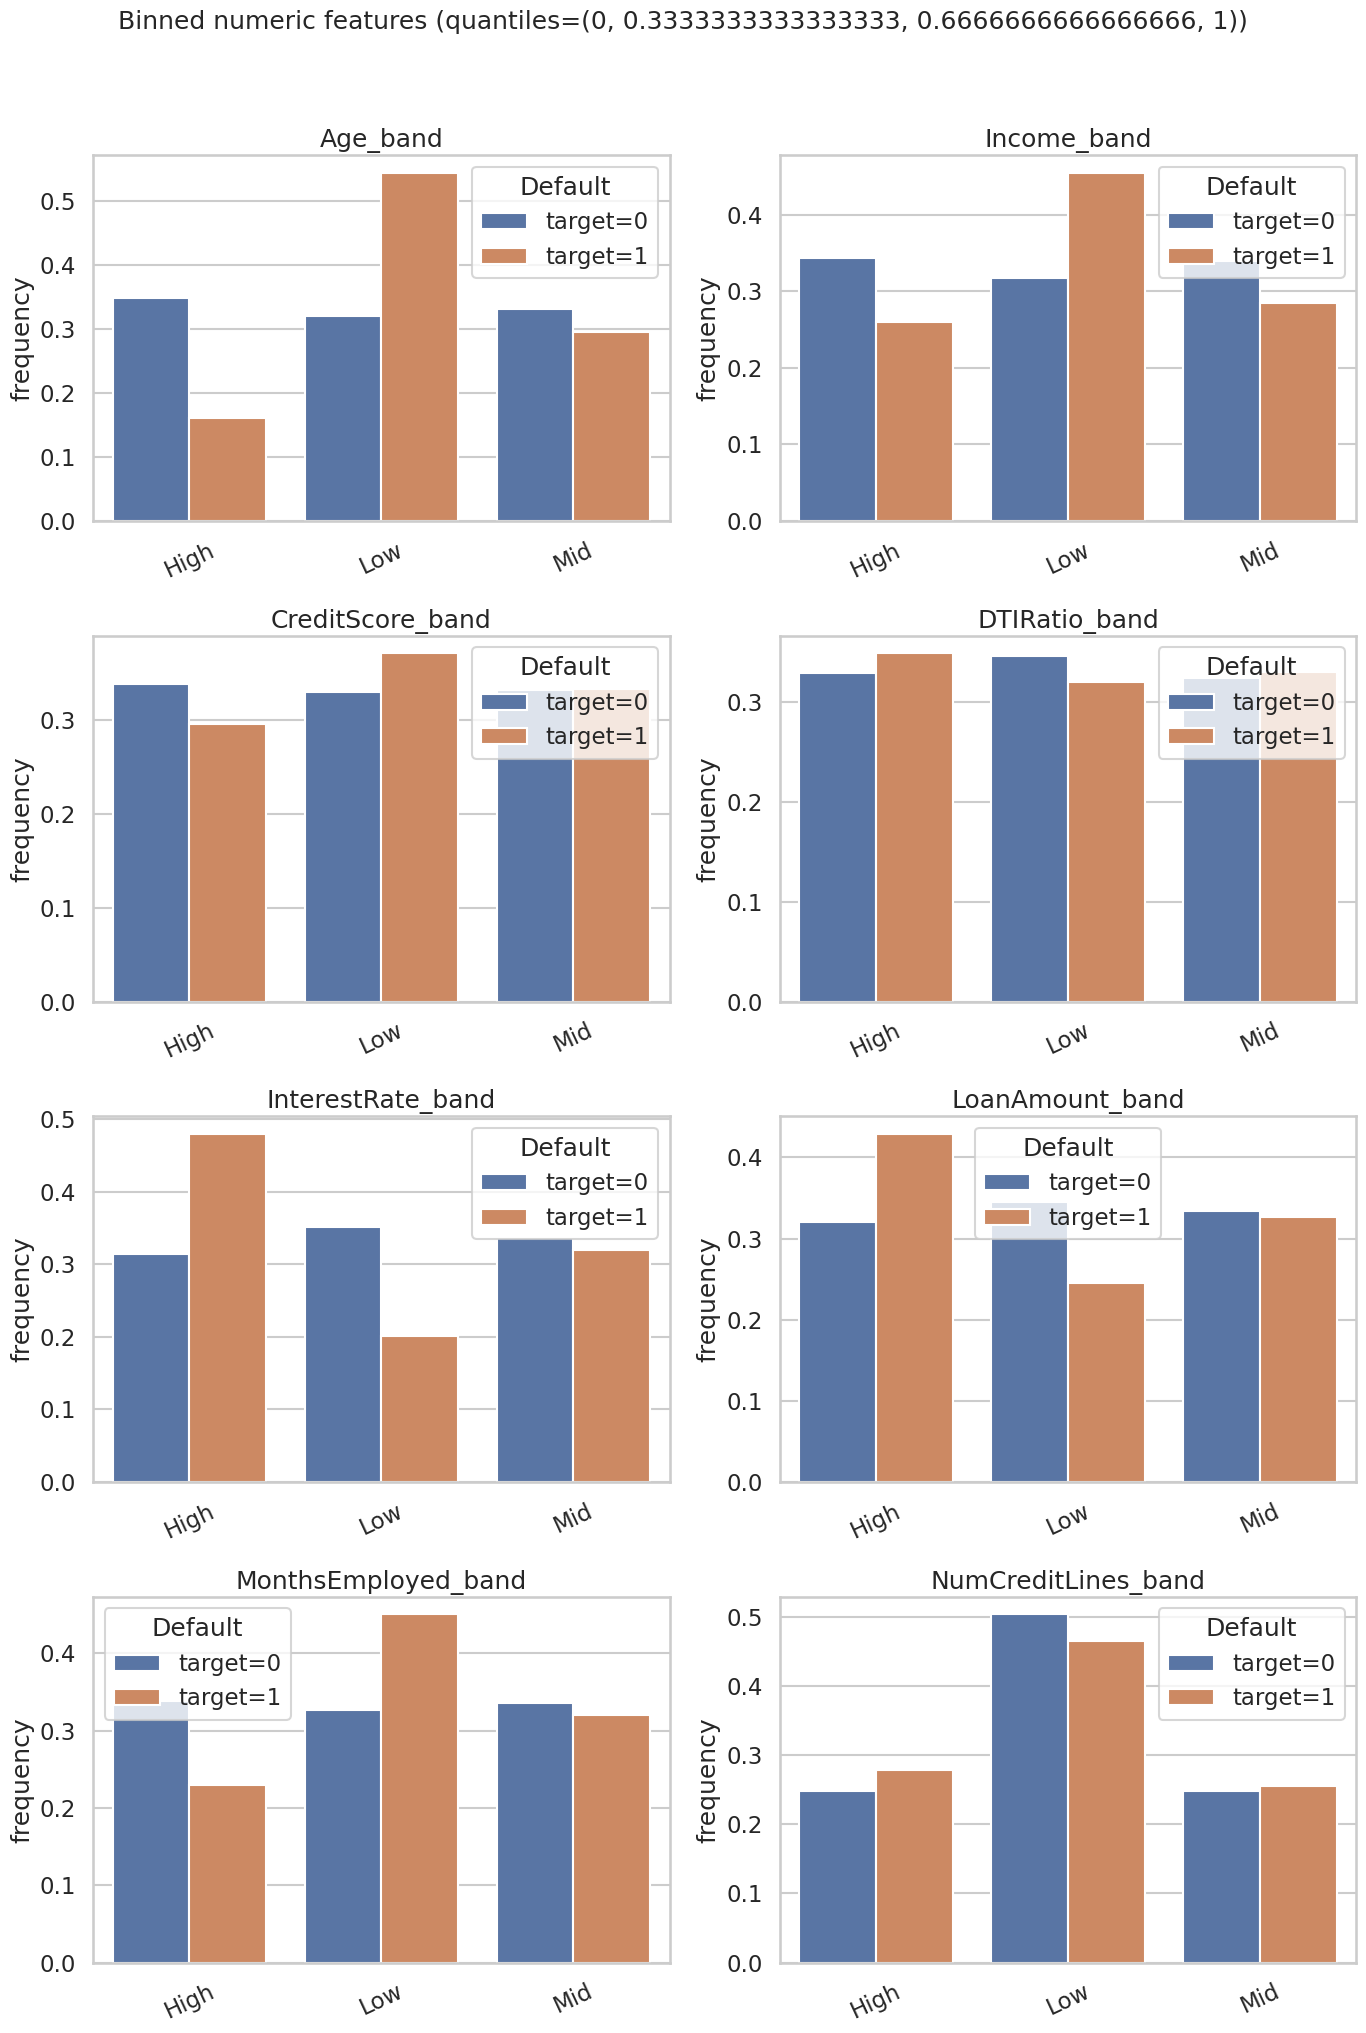

In [344]:
num_features = ["Age","Income","CreditScore","DTIRatio","InterestRate","LoanAmount","MonthsEmployed","NumCreditLines"]

compare_binning_configs_multi(
    df_encoded,
    num_features=num_features,
    target="Default",
    method="quantile",
    q=(0, 1/3, 2/3, 1),
    ncols=2
)

In [172]:
thresholds_dict = {
    "Age": [[35,55], [30,50]],
    "Income": [[60000,120000], [50000,110000]],
    "CreditScore": [],
    "DTIRatio": [[0.25, 0.40], [0.30, 0.45]]
}
# Age [35, 55], Income [60000,120000], Interest Rate [0.33, 0.66], MonthEmployed [0.33, 0.66]
compare_binning_configs_multi(
    df_encoded,
    num_features=list(thresholds_dict.keys()),
    target="Default",
    method="threshold",
    thresholds_dict=thresholds_dict,
    precision=2
)

In [260]:
df_encoded = df.copy()

# 1) Fixed-threshold bands (business cutpoints)
df_encoded["Age_band"] = pd.cut(
    df_encoded["Age"],
    bins=[-np.inf, 35, 55, np.inf],
    labels=["≤35", "35–55", ">55"],
    include_lowest=True
)

df_encoded["Income_band"] = pd.cut(
    df_encoded["Income"],
    bins=[-np.inf, 60000, 120000, np.inf],
    labels=["≤60k", "60k–120k", ">120k"],
    include_lowest=True
)

# 2) Quantile bands at 0.33 and 0.66 (data-driven, train-only recommended)
# If df_encoded is your TRAIN set, this is fine. If it includes test, compute quantiles on train only.

ir_q1, ir_q2 = df_encoded["InterestRate"].quantile([0.33, 0.66]).values
me_q1, me_q2 = df_encoded["MonthsEmployed"].quantile([0.33, 0.66]).values

df_encoded["InterestRate_band"] = pd.cut(
    df_encoded["InterestRate"],
    bins=[-np.inf, ir_q1, ir_q2, np.inf],
    labels=["Low", "Mid", "High"],
    include_lowest=True
)

df_encoded["MonthsEmployed_band"] = pd.cut(
    df_encoded["MonthsEmployed"],
    bins=[-np.inf, me_q1, me_q2, np.inf],
    labels=["Low", "Mid", "High"],
    include_lowest=True
)

In [345]:
test_df = test_df.copy()

# 1) Fixed-threshold bands (business cutpoints)
test_df["Age_band"] = pd.cut(
    test_df["Age"],
    bins=[-np.inf, 35, 55, np.inf],
    labels=["≤35", "35–55", ">55"],
    include_lowest=True
)

test_df["Income_band"] = pd.cut(
    test_df["Income"],
    bins=[-np.inf, 60000, 120000, np.inf],
    labels=["≤60k", "60k–120k", ">120k"],
    include_lowest=True
)

# 2) Quantile bands at 0.33 and 0.66 (data-driven, train-only recommended)
# If df_encoded is your TRAIN set, this is fine. If it includes test, compute quantiles on train only.

ir_q1, ir_q2 = test_df["InterestRate"].quantile([0.33, 0.66]).values
me_q1, me_q2 = test_df["MonthsEmployed"].quantile([0.33, 0.66]).values

test_df["InterestRate_band"] = pd.cut(
    test_df["InterestRate"],
    bins=[-np.inf, ir_q1, ir_q2, np.inf],
    labels=["Low", "Mid", "High"],
    include_lowest=True
)

test_df["MonthsEmployed_band"] = pd.cut(
    test_df["MonthsEmployed"],
    bins=[-np.inf, me_q1, me_q2, np.inf],
    labels=["Low", "Mid", "High"],
    include_lowest=True
)

In [262]:
# test_df["log_income"] = np.log1p(test_df["Income"])
# test_df["log_loan_amount"] = np.log1p(test_df["LoanAmount"])
# test_df["log_months_employed"] = np.log1p(test_df["MonthsEmployed"])

In [263]:
# Payment proxy (approximate monthly burden)
df_encoded["monthly_payment_proxy"] = (
    df_encoded["LoanAmount"] * (1 + df_encoded["InterestRate"])
) / df_encoded["LoanTerm"]

# Affordability
df_encoded["income_to_payment"] = (
    df_encoded["Income"] / (df_encoded["monthly_payment_proxy"] + 1)
)

df_encoded["credit_lines_per_income"] = (
    df_encoded["NumCreditLines"] / (df_encoded["Income"] + 1)
)

df_encoded["credit_score_x_rate"] = (
    df_encoded["CreditScore"] * df_encoded["InterestRate"]
)

df_encoded["dti_x_months_employed"] = (
    df_encoded["DTIRatio"] / (df_encoded["MonthsEmployed"] + 1)
)

In [346]:
# Payment proxy (approximate monthly burden)
test_df["monthly_payment_proxy"] = (
    test_df["LoanAmount"] * (1 + test_df["InterestRate"])
) / test_df["LoanTerm"]

# Affordability
test_df["income_to_payment"] = (
    test_df["Income"] / (test_df["monthly_payment_proxy"] + 1)
)

test_df["credit_lines_per_income"] = (
    test_df["NumCreditLines"] / (test_df["Income"] + 1)
)

test_df["credit_score_x_rate"] = (
    test_df["CreditScore"] * test_df["InterestRate"]
)

test_df["dti_x_months_employed"] = (
    test_df["DTIRatio"] / (test_df["MonthsEmployed"] + 1)
)

In [ ]:
# train_df["log_income"] = np.log1p(train_df["Income"])
# train_df["log_loan_amount"] = np.log1p(train_df["LoanAmount"])
# train_df["log_months_employed"] = np.log1p(train_df["MonthsEmployed"])

## Logistic Regression Method 1 ##

In [359]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [351]:
df_encoded.columns

Index(['Age', 'Education', 'MaritalStatus', 'HasDependents', 'EmploymentType',
       'MonthsEmployed', 'Income', 'CreditScore', 'NumCreditLines',
       'HasMortgage', 'DTIRatio', 'LoanPurpose', 'LoanAmount', 'LoanTerm',
       'InterestRate', 'HasCoSigner', 'Default', 'Age_band', 'Income_band',
       'InterestRate_band', 'MonthsEmployed_band', 'monthly_payment_proxy',
       'income_to_payment', 'credit_lines_per_income', 'credit_score_x_rate',
       'dti_x_months_employed'],
      dtype='object')

In [353]:
TARGET = "Default"

categorical_features = [
    "Education",
    "MaritalStatus",
    "HasDependents",
    "EmploymentType",
    "HasMortgage",
    "LoanPurpose",
    "HasCoSigner",
    "Age_band",
    "Income_band",
    "InterestRate_band",
    "MonthsEmployed_band"
]

numeric_features = [
    "Age",
    "MonthsEmployed",
    "Income",
    "CreditScore",
    "NumCreditLines",
    "DTIRatio",
    "LoanAmount",
    "LoanTerm",
    "InterestRate",
    "monthly_payment_proxy",
    "income_to_payment",
    "credit_lines_per_income",
    "credit_score_x_rate",
    "dti_x_months_employed"
]

In [356]:
X = df_encoded[categorical_features + numeric_features]
y = df_encoded[TARGET]

In [360]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)

log_reg = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    class_weight="balanced",
    max_iter=2000,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", log_reg)
])

In [361]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = cross_val_score(
    pipe,
    X,
    y,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

gini_scores = 2 * auc_scores - 1

print(f"AUC (CV):  mean={auc_scores.mean():.4f}, std={auc_scores.std():.4f}")
print(f"GINI (CV): mean={gini_scores.mean():.4f}, std={gini_scores.std():.4f}")

AUC (CV):  mean=0.7527, std=0.0037
GINI (CV): mean=0.5053, std=0.0073


In [362]:
recall_scorer = make_scorer(recall_score, pos_label=1)

recall_scores = cross_val_score(
    pipe,
    X,
    y,
    cv=cv,
    scoring=recall_scorer,
    n_jobs=-1
)

print(f"Recall (Default): mean={recall_scores.mean():.4f}")

Recall (Default): mean=0.6894


In [284]:
pipe.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'MonthsEmployed',
                                                   'Income', 'CreditScore',
                                                   'NumCreditLines', 'DTIRatio',
                                                   'LoanAmount', 'LoanTerm',
                                                   'InterestRate', 'log_income',
                                                   'log_loan_amount',
                                                   'log_months_employed',
                                                   'monthly_payment_proxy',
                                                   'income_to_payment',
                                                   'credit_lines_per_income',
                                                   'credit_score_x_rate',
                                                   'dti_x_mont...']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Education', 'MaritalStatus',
                                                   'HasDependents',
                                                   'EmploymentType',
                                                   'HasMortgage', 'LoanPurpose',
                                                   'HasCoSigner', 'Age_band',
                                                   'Income_band',
                                                   'InterestRate_band',
                                                   'MonthsEmployed_band'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    n_jobs=-1, penalty='l1',
                                    solver='liblinear'))])

In [285]:
feature_names = (
    pipe.named_steps["prep"]
    .get_feature_names_out()
)

coefs = pipe.named_steps["model"].coef_[0]

coef_df = (
    pd.DataFrame({
        "feature": feature_names,
        "coef": coefs
    })
    .assign(abs_coef=lambda d: d["coef"].abs())
    .sort_values("abs_coef", ascending=False)
)

coef_df.head(15)

,feature,coef,abs_coef
9,num__log_income,-0.862433,0.862433
0,num__Age,-0.572383,0.572383
8,num__InterestRate,0.514424,0.514424
2,num__Income,0.511899,0.511899
25,cat__EmploymentType_Unemployed,0.440049,0.440049
1,num__MonthsEmployed,-0.347701,0.347701
23,cat__EmploymentType_Part-time,0.280311,0.280311
31,cat__HasCoSigner_1,-0.274634,0.274634
6,num__LoanAmount,0.255196,0.255196
22,cat__HasDependents_1,-0.248485,0.248485


In [286]:
y_pred = (test_prob >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

NameError: name 'test_prob' is not defined

## Xgboost ##

In [297]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 14.3 MB/s eta 0:00:00


In [363]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

import optuna
import shap

In [364]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print("Train default rate:", y_train.mean())
print("scale_pos_weight:", scale_pos_weight)

Train default rate: 0.11598125
scale_pos_weight: 7.622083310879991


In [365]:
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [c for c in X_train.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

# Fit preprocess ON TRAIN ONLY
preprocess.fit(X_train)

X_train_tr = preprocess.transform(X_train)
X_test_tr  = preprocess.transform(X_test)

feature_names = preprocess.get_feature_names_out()

In [302]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1500),
        "max_depth": trial.suggest_int("max_depth", 3, 7),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 20.0, log=True),
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "scale_pos_weight": scale_pos_weight,
        "random_state": 42,
        "n_jobs": -1
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []

    for tr_idx, va_idx in cv.split(X_train_tr, y_train):
        X_tr, X_va = X_train_tr[tr_idx], X_train_tr[va_idx]
        y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]

        model = XGBClassifier(**params)
        model.fit(X_tr, y_tr)

        proba = model.predict_proba(X_va)[:, 1]
        aucs.append(roc_auc_score(y_va, proba))

    return float(np.mean(aucs))


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best AUC:", study.best_value)
print("Best params:", study.best_params)

[I 2026-02-07 08:22:18,969] A new study created in memory with name: no-name-6bf0f185-23f0-4d45-94a6-e76e911af930
[I 2026-02-07 08:23:54,945] Trial 0 finished with value: 0.7564687582422923 and parameters: {'n_estimators': 760, 'max_depth': 3, 'learning_rate': 0.0347560122998027, 'subsample': 0.7047348864573756, 'colsample_bytree': 0.988370883769097, 'min_child_weight': 11, 'gamma': 2.775330112306445, 'reg_lambda': 15.854998163773969}. Best is trial 0 with value: 0.7564687582422923.
[I 2026-02-07 08:25:58,399] Trial 1 finished with value: 0.7240289206832725 and parameters: {'n_estimators': 931, 'max_depth': 7, 'learning_rate': 0.09411788163193142, 'subsample': 0.9745517750255825, 'colsample_bytree': 0.7249793053278003, 'min_child_weight': 6, 'gamma': 0.4619307230031988, 'reg_lambda': 2.676310305758563}. Best is trial 0 with value: 0.7564687582422923.
[I 2026-02-07 08:26:50,293] Trial 2 finished with value: 0.7554996149647214 and parameters: {'n_estimators': 403, 'max_depth': 5, 'learni

Best AUC: 0.7570698266407777
Best params: {'n_estimators': 1209, 'max_depth': 3, 'learning_rate': 0.0149245769587885, 'subsample': 0.7212259075827006, 'colsample_bytree': 0.9994439253816656, 'min_child_weight': 9, 'gamma': 0.745959440810195, 'reg_lambda': 2.0099699377483704}


In [366]:
best_params = study.best_params.copy()
best_params.update({
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "scale_pos_weight": scale_pos_weight,
    "random_state": 42,
    "n_jobs": -1
})

final_model = XGBClassifier(**best_params)
final_model.fit(X_train_tr, y_train)

test_prob = final_model.predict_proba(X_test_tr)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)

auc_test = roc_auc_score(y_test, test_prob)
gini_test = 2 * auc_test - 1

print(f"TEST AUC:  {auc_test:.4f}")
print(f"TEST GINI: {gini_test:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_pred))

print("\nClassification Report:")
print(classification_report(y_test, test_pred, digits=3))

TEST AUC:  0.7517
TEST GINI: 0.5034

Confusion Matrix:
[[24720 10641]
 [ 1512  3127]]

Classification Report:
              precision    recall  f1-score   support

           0      0.942     0.699     0.803     35361
           1      0.227     0.674     0.340      4639

    accuracy                          0.696     40000
   macro avg      0.585     0.687     0.571     40000
weighted avg      0.859     0.696     0.749     40000



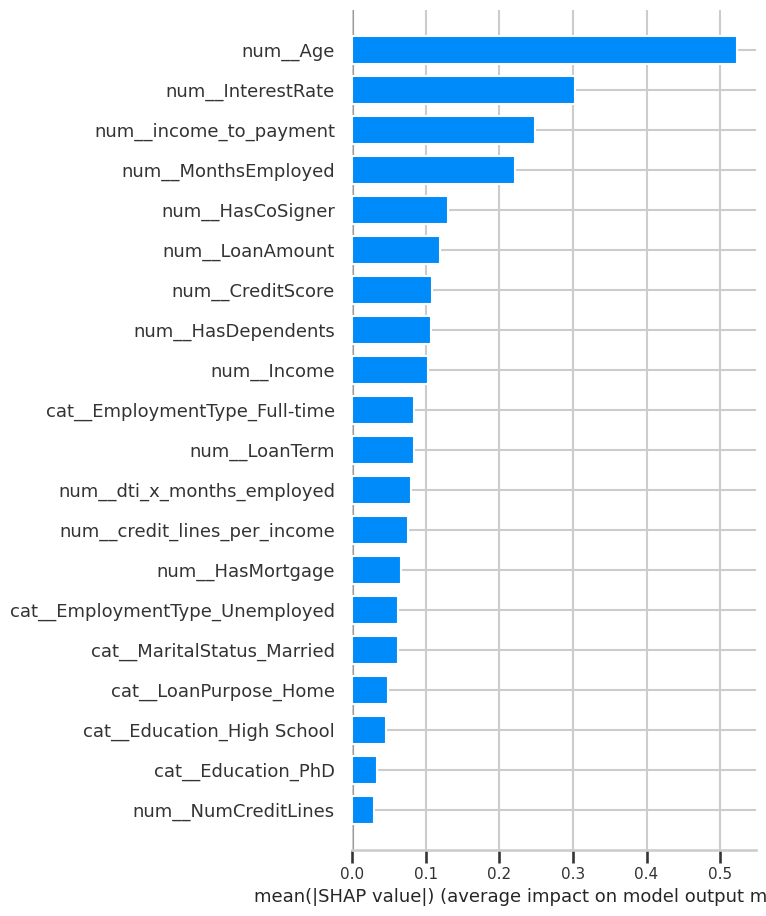

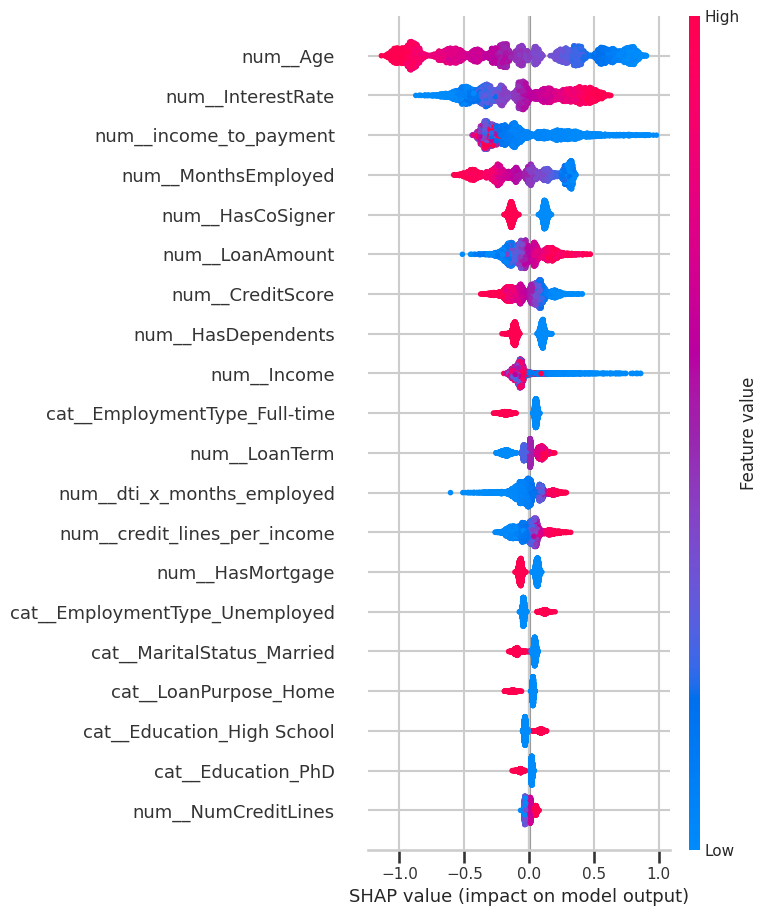

In [367]:
n_sample = 5000
idx = np.random.RandomState(42).choice(X_test_tr.shape[0], size=min(n_sample, X_test_tr.shape[0]), replace=False)

X_shap = X_test_tr[idx]
X_shap_dense = X_shap.toarray() if hasattr(X_shap, "toarray") else X_shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_shap_dense)

# Summary (bar)
shap.summary_plot(shap_values, X_shap_dense, feature_names=feature_names, plot_type="bar", show=False)
plt.tight_layout()
plt.show()

# Summary (beeswarm)
shap.summary_plot(shap_values, X_shap_dense, feature_names=feature_names, show=False)
plt.tight_layout()
plt.show()

In [368]:
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    precision_recall_curve, roc_curve
)

def find_best_threshold_ks(y_true, y_prob):
    fpr, tpr, thr = roc_curve(y_true, y_prob)
    ks = tpr - fpr
    idx = np.argmax(ks)
    return float(thr[idx]), float(ks[idx]), float(tpr[idx]), float(fpr[idx])

def find_best_threshold_fbeta(y_true, y_prob, beta=2.0):
    precision, recall, thr = precision_recall_curve(y_true, y_prob)
    # precision_recall_curve returns thr of length n-1
    thr = np.append(thr, 1.0)  # align lengths
    beta2 = beta**2
    fbeta = (1+beta2) * (precision*recall) / (beta2*precision + recall + 1e-12)
    idx = np.argmax(fbeta)
    return float(thr[idx]), float(fbeta[idx]), float(precision[idx]), float(recall[idx])

def report_at_threshold(y_true, y_prob, thr, title=""):
    y_pred = (y_prob >= thr).astype(int)
    print(f"\n=== {title} | threshold={thr:.4f} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=3))


In [370]:
auc_test = roc_auc_score(y_test, test_prob)
gini_test = 2*auc_test - 1
print(f"FULL model TEST AUC={auc_test:.4f}, GINI={gini_test:.4f}")

# Default 0.5 threshold
report_at_threshold(y_test, test_prob, 0.5, title="FULL model (default 0.50)")

# KS-max threshold
thr_ks, ks_val, tpr_val, fpr_val = find_best_threshold_ks(y_test, test_prob)
print(f"\nKS-max threshold={thr_ks:.4f} | KS={ks_val:.4f} | TPR={tpr_val:.3f} | FPR={fpr_val:.3f}")
report_at_threshold(y_test, test_prob, thr_ks, title="FULL model (KS-max)")

# Recall-focused threshold (F2-score)
thr_f2, f2_val, prec_f2, rec_f2 = find_best_threshold_fbeta(y_test, test_prob, beta=2.0)
print(f"\nF2-best threshold={thr_f2:.4f} | F2={f2_val:.4f} | Precision={prec_f2:.3f} | Recall={rec_f2:.3f}")
report_at_threshold(y_test, test_prob, thr_f2, title="FULL model (F2-best)")

FULL model TEST AUC=0.7517, GINI=0.5034

=== FULL model (default 0.50) | threshold=0.5000 ===
Confusion Matrix:
 [[24720 10641]
 [ 1512  3127]]

Classification Report:
               precision    recall  f1-score   support

           0      0.942     0.699     0.803     35361
           1      0.227     0.674     0.340      4639

    accuracy                          0.696     40000
   macro avg      0.585     0.687     0.571     40000
weighted avg      0.859     0.696     0.749     40000


KS-max threshold=0.5063 | KS=0.3753 | TPR=0.667 | FPR=0.292

=== FULL model (KS-max) | threshold=0.5063 ===
Confusion Matrix:
 [[25031 10330]
 [ 1543  3096]]

Classification Report:
               precision    recall  f1-score   support

           0      0.942     0.708     0.808     35361
           1      0.231     0.667     0.343      4639

    accuracy                          0.703     40000
   macro avg      0.586     0.688     0.576     40000
weighted avg      0.859     0.703     0.754     

In [372]:
# XGB feature importance on encoded features
imp = final_model.feature_importances_
imp_df = pd.DataFrame({"feature": feature_names, "importance": imp}).sort_values("importance", ascending=False)

top15 = imp_df.head(15)
print(top15)

top15_features = top15["feature"].tolist()

                           feature  importance
35               cat__Age_band_≤35    0.337069
34               cat__Age_band_>55    0.091092
43    cat__MonthsEmployed_band_Low    0.090926
3                         num__Age    0.069834
40      cat__InterestRate_band_Low    0.063167
13          num__income_to_payment    0.053197
11               num__InterestRate    0.030291
4              num__MonthsEmployed    0.025908
5                      num__Income    0.018753
2                 num__HasCoSigner    0.016989
24   cat__EmploymentType_Full-time    0.016382
0               num__HasDependents    0.013962
27  cat__EmploymentType_Unemployed    0.011904
14    num__credit_lines_per_income    0.010744
10                   num__LoanTerm    0.010295


In [373]:
# Find column indices for top-15 features in transformed matrix
name_to_idx = {name: i for i, name in enumerate(feature_names)}
top15_idx = [name_to_idx[f] for f in top15_features]

X_train_top15 = X_train_tr[:, top15_idx]
X_test_top15  = X_test_tr[:, top15_idx]

# Retrain using same best params
final_model_top15 = XGBClassifier(**best_params)
final_model_top15.fit(X_train_top15, y_train)

test_prob_top15 = final_model_top15.predict_proba(X_test_top15)[:, 1]

auc_top15 = roc_auc_score(y_test, test_prob_top15)
gini_top15 = 2*auc_top15 - 1

print(f"\nTOP-15 model TEST AUC={auc_top15:.4f}, GINI={gini_top15:.4f}")


TOP-15 model TEST AUC=0.7453, GINI=0.4906


In [380]:
features = X_train.columns

In [384]:
loan_ids = test_df["loan_id"].copy()
X_test_final = test_df[features].copy()

In [386]:
X_test_tr = preprocess.transform(X_test_final)

In [387]:
test_pd = final_model.predict_proba(X_test_tr)[:, 1]

In [390]:
threshold = thr_ks
threshold

0.5062644481658936

In [391]:
test_pred = (test_pd >= threshold).astype(int)

In [393]:
submission_df = pd.DataFrame({
    "loan_id": loan_ids,
    "predicted_default": test_pred,
})

submission_df.head()

,loan_id,predicted_default
0,200000,0
1,200001,1
2,200002,0
3,200003,1
4,200004,1


In [394]:
submission_df.shape

(50000, 2)

In [395]:
submission_df.to_csv('predicted_df.csv')

In [396]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, test_prob)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.7517


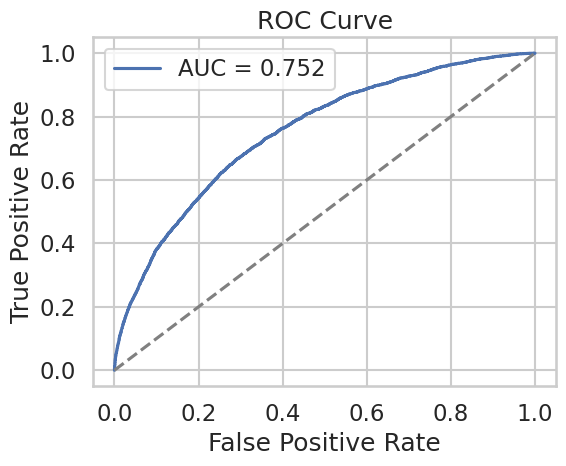

In [397]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, test_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()
